In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import math
import scipy.stats as st

%matplotlib inline

plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/wandakinasih/gg2/main/ab_data.csv')
data['date'] = pd.to_datetime(data['timestamp']).dt.date
data = data.reindex(columns=['user_id','date', 'group','landing_page','converted'])
data.head()

,user_id,date,group,landing_page,converted
0,851104,2017-01-21,control,old_page,0
1,804228,2017-01-12,control,old_page,0
2,661590,2017-01-11,treatment,new_page,0
3,853541,2017-01-08,treatment,new_page,0
4,864975,2017-01-21,control,old_page,1


##**A/B Test**

In [ ]:
data['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = data[data['group'] == 'control']['converted']
treatment_results = data[data['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.4f}')
print(f'p-value: {pval:.4f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.4f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.4f}]')

z statistic: 1.2369
p-value: 0.2161
ci 95% for control group: [0.119, 0.1221]
ci 95% for treatment group: [0.117, 0.1206]


In [ ]:
successes

[17723, 17514]

In [ ]:
nobs

[147202, 147276]

##**Conclusion**
- p value = 0.219 > 0.05 ==> can't reject null hypothesis H0, which means that new design didn't perform significantly different (let alone better) than our old one

- confidence interval for treatment grop = [0.117, 0.127] atau [11.7%,12.7%]
includes baseline value of 12.03% conversion rate but doesn't include target value of 13.03%

- What this means is that it is more likely that the true conversion rate of the new design is similar to our baseline, rather than the 13.03% target we had hoped for. This is further proof that our new design is not likely to be an improvement on our old design

In [ ]:
import numpy as np
from scipy.stats import norm

X_con = 17723 
N_con = 147202 
X_exp = 17514 
N_exp = 147276 

# Significance Level
alpha = 0.05

p_con_hat = X_con / N_con
p_exp_hat = X_exp / N_exp

p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled_hat*(1-p_pooled_hat) * (1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance)

# test statsitics
Test_stat = (p_con_hat - p_exp_hat)/SE
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)

# Margin of error
m = SE * Z_crit
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2

# Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE * Z_crit, (p_con_hat-p_exp_hat) + SE * Z_crit]

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(p_value)

print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

Test Statistics stat:  1.2369217547321678
Z-critical:  1.959963984540054
P_value:  0.21611613269757501
Confidence Interval of 2 sample Z-test for proportions:  [-0.  0.]


In [ ]:
print(p_con_hat)
print(p_exp_hat)
print(p_pooled_hat)
print(pooled_variance)
print(SE)

0.12039917935897611
0.11891957956489856
0.11965919355605512
1.4308828178078735e-06
0.0011961951420265313


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


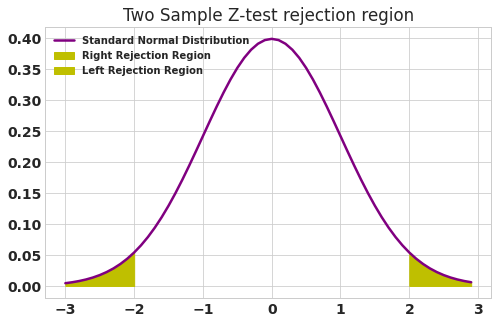

In [ ]:
import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)


plt.figure(figsize=(8,5))
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend(loc=2, fontsize=10)